# The Singular Value Decomposition

Often more important in today's world than the eigenvalue decomposition.  Shows up in machine learning, image compression, and many discrete applications.

## Definition

For any $m \times n$ matrix $A$ of rank $r$:

$$A = U \Sigma V^T = \\
\begin{pmatrix} u_1 & \cdots & u_r & \cdots & u_m\end{pmatrix} \begin{pmatrix} \sigma_1 & & & & & \\ & \sigma_2 & & & & \\ & & \ddots & & & \\ & & & \sigma_r & & \\ & & & & 0 & \\ & & & & & \ddots \end{pmatrix} \begin{pmatrix} v_1 & \cdots & v_r & \cdots & v_n\end{pmatrix}^T \\
= \sigma_1 u_1 v_1^T + \cdots \sigma_r u_r v_r^T
$$

(more generally: $U \Sigma V^H$ for complex matrices)

* $U$ is $m\times m$ orthogonal (unitary) matrix of **left singular vectors** $u_k$
* $V$ is $n \times n$ orthogonal (unitary) of **right singular vectors** $v_k$
* $\Sigma$ is $m\times n$  diagonal matrix of r **singular values** $\sigma_k$ (and $n-r$ columns / $m-r$ rows of zeros)

The most basic SVD is a matrix decomposition of a matrix A into $U$ Diagonal($\sigma$) $V^T$, where $U$ and $V$ are  square orthogonal and $\sigma$ is a vector of decreasing singular
values that are non-negative. The notation $\Sigma$ denotes the diagonal matrix

$$
\Sigma = \begin{pmatrix}
\sigma_1 & 0 & \cdots \\
0 & \sigma_2 & \cdots \\
& & \ddots
\end{pmatrix}
$$

* The vectors $u_1, \ldots, u_r$ form an **orthonormal basis for the column space** $C(A)$, and $v_1, \ldots, v_r$ form an **orthonormal basis for the row space** $C(A^T)$.

### Square Example

In [1]:
A = randn(5,5)
U,σ,V = svd(A)
display(U), display(σ), display(V);

5×5 Array{Float64,2}:
  0.137964   0.802975  -0.33451   -0.133751   0.454325
 -0.594489  -0.354293  -0.644095  -0.154276   0.287055
 -0.412599   0.105922   0.552392  -0.703149   0.137797
  0.60776   -0.271151  -0.310012  -0.66645   -0.12978 
  0.296544  -0.380744   0.268331   0.140486   0.821801

5-element Array{Float64,1}:
 3.3395  
 2.25461 
 1.53138 
 0.827798
 0.433907

5×5 Array{Float64,2}:
 -0.000224795   0.878455  -0.22219     0.310668  -0.287113 
  0.553295      0.033749  -0.634097   -0.539019   0.0102978
  0.576199      0.289554   0.722739   -0.239351   0.067176 
 -0.26087       0.331897  -0.0603928  -0.158941   0.890439 
  0.542039     -0.182154  -0.150181    0.728281   0.346505 

In [2]:
σ
Σ = Diagonal(σ)

5×5 Diagonal{Float64}:
 3.3395   ⋅        ⋅        ⋅         ⋅      
  ⋅      2.25461   ⋅        ⋅         ⋅      
  ⋅       ⋅       1.53138   ⋅         ⋅      
  ⋅       ⋅        ⋅       0.827798   ⋅      
  ⋅       ⋅        ⋅        ⋅        0.433907

In [3]:
round(U'U,2)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] round(::Array{Float64,2}, ::Int64, ::Int64) at ./deprecated.jl:57 (repeats 2 times)
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /Users/stevenj/.julia/v0.6/Compat/src/Compat.jl:464
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/stevenj/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /Users/stevenj/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[3], in expression starting on line 1


5×5 Array{Float64,2}:
 1.0   0.0   0.0   0.0  0.0
 0.0   1.0   0.0  -0.0  0.0
 0.0   0.0   1.0  -0.0  0.0
 0.0  -0.0  -0.0   1.0  0.0
 0.0   0.0   0.0   0.0  1.0

In [4]:
round(V'V,2)

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] round(::Array{Float64,2}, ::Int64, ::Int64) at ./deprecated.jl:57 (repeats 2 times)
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /Users/stevenj/.julia/v0.6/Compat/src/Compat.jl:464
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/stevenj/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /Users/stevenj/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[4], in expression starting on line 1


5×5 Array{Float64,2}:
  1.0  0.0   0.0   0.0  -0.0
  0.0  1.0   0.0   0.0   0.0
  0.0  0.0   1.0   0.0  -0.0
  0.0  0.0   0.0   1.0  -0.0
 -0.0  0.0  -0.0  -0.0   1.0

In [5]:
σ

5-element Array{Float64,1}:
 3.3395  
 2.25461 
 1.53138 
 0.827798
 0.433907

In [6]:
Σ=Diagonal(σ)
U*Σ*V'

5×5 Array{Float64,2}:
  1.61307    0.702552   0.459195    0.704746  -0.0154304
 -0.557536  -0.429852  -2.04916     0.443562  -0.832325 
 -0.175854  -0.976346   0.0299311   0.533374  -1.32059  
 -0.58723    1.70017    0.777593   -0.666153   0.861492 
 -0.911867   0.199388   0.615157   -0.269035   0.839695 

In [7]:
A

5×5 Array{Float64,2}:
  1.61307    0.702552   0.459195    0.704746  -0.0154304
 -0.557536  -0.429852  -2.04916     0.443562  -0.832325 
 -0.175854  -0.976346   0.0299311   0.533374  -1.32059  
 -0.58723    1.70017    0.777593   -0.666153   0.861492 
 -0.911867   0.199388   0.615157   -0.269035   0.839695 

### "tall-skinny" full column rank example

In [8]:
A = randn(5,3)
U,σ,V = svd(A,thin=false) # thin=false gives the basic svd, 
                          # often the default (thin=true) is more useful
display(U), display(σ), display(V);

5×5 Array{Float64,2}:
 -0.504009    0.423015   0.407325  -0.184504    0.605869
  0.281671    0.137801  -0.636942  -0.588282    0.387172
  0.526002   -0.48418    0.346672   0.150287    0.588322
 -0.0884007   0.208707  -0.492116   0.766438    0.344994
  0.618177    0.723933   0.256966   0.0993447  -0.133704

3-element Array{Float64,1}:
 3.32895
 1.39294
 1.19936

3×3 Array{Float64,2}:
  0.963315  -0.0356066   0.266002
 -0.233653  -0.598875    0.765999
  0.132027  -0.80005    -0.585225

In [9]:
Σ = zeros(A) # Make Σ the size of A
for i=1:length(σ) Σ[i,i]=σ[i] end # put the singular values on the diagonal

display(A)
U*Σ*V'

5×3 Array{Float64,2}:
 -1.5073     0.413363  -0.978834 
  0.693232  -0.919205   0.417295 
  1.82141    0.313256   0.527438 
 -0.450838  -0.557453   0.0739727
  2.02846   -0.848655  -0.715432 

5×3 Array{Float64,2}:
 -1.5073     0.413363  -0.978834 
  0.693232  -0.919205   0.417295 
  1.82141    0.313256   0.527438 
 -0.450838  -0.557453   0.0739727
  2.02846   -0.848655  -0.715432 

In [10]:
Σ

5×3 Array{Float64,2}:
 3.32895  0.0      0.0    
 0.0      1.39294  0.0    
 0.0      0.0      1.19936
 0.0      0.0      0.0    
 0.0      0.0      0.0    

### short fat matrix

In [11]:
A = randn(3,5)
U,σ,V = svd(A,thin=false) # thin=false gives the basic svd, 
                          # often the default (thin=true) is more useful
display(U), display(σ), display(V)
Σ = zeros(A) # Make Σ the size of A
for i=1:length(σ) Σ[i,i]=σ[i] end # put the singular values on the diagonal
U*Σ*V'
A

3×3 Array{Float64,2}:
 -0.426242   0.887623   0.174477
 -0.762784  -0.456351   0.458153
  0.48629    0.0621956  0.871581

3-element Array{Float64,1}:
 2.72821 
 2.20502 
 0.895075

5×5 Array{Float64,2}:
 -0.363091  -0.045751  -0.742966    0.554305   -0.0825792
  0.591144   0.315986   0.147099    0.656974    0.312168 
 -0.547589  -0.294552   0.626749    0.465894    0.0592773
  0.43765   -0.888701  -0.0909405   0.0824995  -0.0599702
 -0.165291  -0.146663  -0.158994   -0.19305     0.942667 

3×5 Array{Float64,2}:
  0.216656  -0.0460008   0.158154  -2.26253    -0.119669
  0.496966  -1.48784     1.69297   -0.0537908   0.426358
 -1.0676     0.942364   -0.277938   0.387808   -0.363442

In [12]:
A

3×5 Array{Float64,2}:
  0.216656  -0.0460008   0.158154  -2.26253    -0.119669
  0.496966  -1.48784     1.69297   -0.0537908   0.426358
 -1.0676     0.942364   -0.277938   0.387808   -0.363442

In [13]:
Σ

3×5 Array{Float64,2}:
 2.72821  0.0      0.0       0.0  0.0
 0.0      2.20502  0.0       0.0  0.0
 0.0      0.0      0.895075  0.0  0.0

Thin: for tall skinny, U is the size of A, Σ is square <br>
Thin: for short fat, V is the size of A, Σ is square 

In [14]:
A = randn(5,3)
U,σ,V = svd(A) # thin = true
display(U)
display(round(U'U,2))
display(A)
U*Diagonal(σ)*V'

5×3 Array{Float64,2}:
 -0.0393212   0.625641  -0.389647
  0.601076   -0.297929   0.29942 
  0.759555    0.221421  -0.433578
  0.220175   -0.16661    0.259325
 -0.108445   -0.665601  -0.709425

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] round(::Array{Float64,2}, ::Int64, ::Int64) at ./deprecated.jl:57 (repeats 2 times)
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /Users/stevenj/.julia/v0.6/Compat/src/Compat.jl:464


3×3 Array{Float64,2}:
  1.0  -0.0  0.0
 -0.0   1.0  0.0
  0.0   0.0  1.0

5×3 Array{Float64,2}:
  0.980362   0.514368    0.415942
 -1.05405   -0.476334    1.11009 
 -0.494685   0.0577207   1.88208 
 -0.456699  -0.267213    0.360968
 -1.04265   -0.0392818  -0.786467

 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/stevenj/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /Users/stevenj/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[14], in expression starting on line 4


5×3 Array{Float64,2}:
  0.980362   0.514368    0.415942
 -1.05405   -0.476334    1.11009 
 -0.494685   0.0577207   1.88208 
 -0.456699  -0.267213    0.360968
 -1.04265   -0.0392818  -0.786467

In [15]:
A = randn(3,5)
U,σ,V = svd(A)
display(V)
display(round(V'V,2))
display(A)
U*Diagonal(σ)*V'

5×3 Array{Float64,2}:
 -0.542191   -0.0187858   0.709478
 -0.433227    0.749758   -0.448208
 -0.391919   -0.273888   -0.124539
  0.601881    0.382869    0.272958
 -0.0498276   0.464657    0.453579

3×3 Array{Float64,2}:
  1.0  0.0  -0.0
  0.0  1.0   0.0
 -0.0  0.0   1.0

3×5 Array{Float64,2}:
  1.14962   -0.546918   1.09557   -1.60263   -0.547976
 -1.99217   -2.02499   -1.42534    2.21458   -0.31118 
  0.392026   1.90935   -0.442522   0.606679   1.19657 

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] round(::Array{Float64,2}, ::Int64, ::Int64) at ./deprecated.jl:57 (repeats 2 times)
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /Users/stevenj/.julia/v0.6/Compat/src/Compat.jl:464
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/stevenj/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /Users/stevenj/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[15], in expression starting on line 4


3×5 Array{Float64,2}:
  1.14962   -0.546918   1.09557   -1.60263   -0.547976
 -1.99217   -2.02499   -1.42534    2.21458   -0.31118 
  0.392026   1.90935   -0.442522   0.606679   1.19657 

## Data "compression"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  111k  100  111k    0     0  1482k      0 --:--:-- --:--:-- --:--:-- 2028k


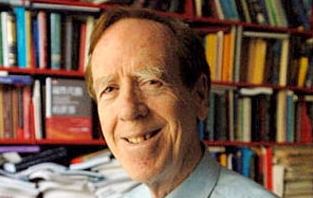

In [16]:
using Images, Interact
picture = download("http://web.mit.edu/jfrench/Public/gstrang.png")
pimage = load(picture)

In [17]:
p = float.(channelview(pimage)) # convert to an array

3×198×313 Array{Float32,3}:
[:, :, 1] =
 0.501961  0.407843  0.27451   0.152941  …  0.811765  0.729412  0.690196
 0.576471  0.466667  0.282353  0.129412     0.776471  0.686275  0.631373
 0.592157  0.454902  0.270588  0.137255     0.788235  0.701961  0.611765

[:, :, 2] =
 0.478431  0.4       0.278431  0.156863  …  0.792157  0.717647  0.67451 
 0.560784  0.462745  0.298039  0.133333     0.74902   0.670588  0.607843
 0.572549  0.45098   0.27451   0.141176     0.764706  0.686275  0.576471

[:, :, 3] =
 0.47451   0.403922  0.298039  0.168627  …  0.788235  0.717647  0.67451 
 0.556863  0.478431  0.317647  0.145098     0.741176  0.670588  0.603922
 0.560784  0.454902  0.294118  0.145098     0.74902   0.678431  0.564706

...

[:, :, 311] =
 0.180392  0.14902   0.14902   0.145098  …  0.521569  0.576471  0.627451
 0.203922  0.211765  0.211765  0.160784     0.431373  0.529412  0.588235
 0.196078  0.2       0.211765  0.196078     0.258824  0.333333  0.447059

[:, :, 312] =
 0.160784  0.12549   0.

In [18]:
pr,pg,pb = p[1,:,:],p[2,:,:],p[3,:,:]
Ur,σr,Vr = svd(pr)
Ug,σg,Vg = svd(pg)
Ub,σb,Vb = svd(pb)

(Float32[-0.0425342 -0.0450355 … 0.00151836 0.00756665; -0.0404301 -0.0474971 … 0.0181529 -0.0318149; … ; -0.143038 0.101536 … 0.0478255 -0.0318742; -0.144002 0.111712 … 0.0020869 -0.00648022], Float32[85.0721, 21.0869, 16.5932, 14.0062, 11.7329, 10.1639, 9.09969, 7.38199, 7.21165, 6.61043  …  0.0242462, 0.022777, 0.0226533, 0.0215464, 0.0208985, 0.0198097, 0.0191087, 0.0189206, 0.0177044, 0.0170277], Float32[-0.0697387 -0.0166765 … -0.00833062 -0.00208743; -0.0695658 -0.0410424 … 0.0132683 0.054568; … ; -0.0231986 -0.00117249 … 0.00207896 -0.0117388; -0.0217245 0.00349054 … 0.0677017 0.0426328])

In [19]:
866-211-6588

-5933

In [20]:
using Interact

Interact.Slider{Int64}(1: "input" = 1 Int64 , "", 1, 1:40, "horizontal", true, "d", true)

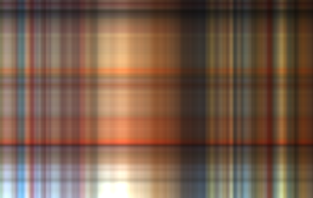

In [21]:
@manipulate for k=slider(1:40,value=1)
    p̂r = Ur[:,1:k]*Diagonal(σr[1:k])*Vr[:,1:k]'
    p̂g = Ug[:,1:k]*Diagonal(σg[1:k])*Vg[:,1:k]'
    p̂b = Ub[:,1:k]*Diagonal(σb[1:k])*Vb[:,1:k]'
    img = colorview(RGB, p̂r,p̂g,p̂b) 
end

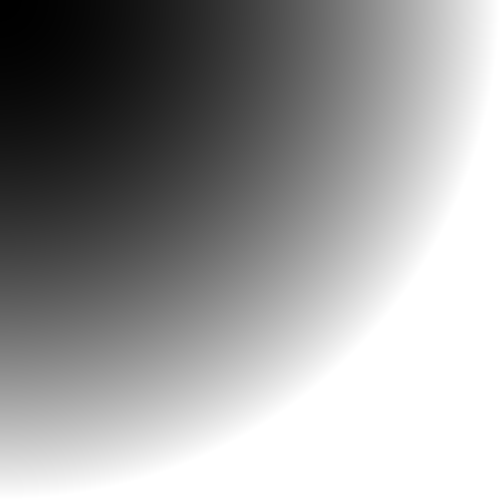

In [22]:
u = 1.0*[1:500;]/500
v = 1.0*[1:500;]/500
img = colorview(Gray,u.^2.+v'.^2)

In [23]:
u = [1:5;]
v = u
u*v'

5×5 Array{Int64,2}:
 1   2   3   4   5
 2   4   6   8  10
 3   6   9  12  15
 4   8  12  16  20
 5  10  15  20  25

Moral of the story:  if k is large enough
    U[:,1:k] * Diagonal(sigma(1:k)) * V[:,1:k]'
    is a good approsimation to A often requiring less storage and less computation

let $u=$Ur[:,1:1], that is the first column of Ur <br>
let $v=$Vr[:,1:1], that is the first column of Vr <br>
let $\sigma$  be the first sing value: Diagonal(σr[1:k])

Consider $u*\sigma*v'$

Now consider k=2 and we now have
$u_1*\sigma_1*v_1' + u_2*\sigma_2*v_2'$


# What happens when a matrix has low rank?

The four fundamental subspaces done nicely --- could have been an early lecture if we accepted the existence of the SVD

U  contains a basis for the column space and the left nullspace.

V contains a basis for the row space and the nullspace.

## The svd not as an eigenproblem

In [24]:
A = eye(5)
svdvals(A)

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [25]:
A = Diagonal(randn(5))

5×5 Diagonal{Float64}:
 -0.0248082    ⋅          ⋅         ⋅       ⋅      
   ⋅         -0.977161    ⋅         ⋅       ⋅      
   ⋅           ⋅        -0.855298   ⋅       ⋅      
   ⋅           ⋅          ⋅        0.2969   ⋅      
   ⋅           ⋅          ⋅         ⋅      0.211585

In [26]:
svdvals(A) # absolute value of diagonals
# svdvals always are in monotonically non-increasing order

5-element Array{Float64,1}:
 0.977161 
 0.855298 
 0.2969   
 0.211585 
 0.0248082

In [27]:
Q,_ = qr(randn(5,5))

([-0.767562 0.260866 … 0.410858 0.413307; 0.249213 -0.490439 … -0.0480636 0.830337; … ; -0.173704 0.438618 … -0.827778 0.24743; 0.553226 0.694974 … 0.357335 0.252558], [-1.21028 -0.728475 … -1.63971 -0.788631; 0.0 -1.22128 … 0.233973 -0.465832; … ; 0.0 0.0 … -0.60178 -1.30788; 0.0 0.0 … 0.0 -1.04679])

In [28]:
Q'Q

5×5 Array{Float64,2}:
  1.0          -7.87624e-17   3.67059e-17  -3.93175e-17  -1.23886e-16
 -7.87624e-17   1.0          -2.20807e-17  -1.2615e-16    1.45712e-17
  3.67059e-17  -2.20807e-17   1.0           1.11841e-17  -2.18674e-17
 -3.93175e-17  -1.2615e-16    1.11841e-17   1.0          -1.55207e-18
 -1.23886e-16   1.45712e-17  -2.18674e-17  -1.55207e-18   1.0        

In [29]:
svdvals(Q)
# Q = Q * (Σ=I) * (V=I)'

5-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0
 1.0

In [30]:
D = Diagonal(randn(5))

5×5 Diagonal{Float64}:
 0.648603    ⋅        ⋅          ⋅         ⋅      
  ⋅        -0.98904   ⋅          ⋅         ⋅      
  ⋅          ⋅       0.455635    ⋅         ⋅      
  ⋅          ⋅        ⋅        -0.87071    ⋅      
  ⋅          ⋅        ⋅          ⋅       -0.267413

In [31]:
svdvals(Q*D)

5-element Array{Float64,1}:
 0.98904 
 0.87071 
 0.648603
 0.455635
 0.267413

In [32]:
svdvals(D*Q)

5-element Array{Float64,1}:
 0.98904 
 0.87071 
 0.648603
 0.455635
 0.267413

## The SVD as an eigenproblem

In [33]:
# Notice if A = U Σ V' then
# A'A = U Σ V'V Σ' U'
# A'A = V Σ² V'
# A*A' = U Σ² U'

Notice that the EIGENVALUES of A'A are the squares
of the singular values, and the EIGENVECTORS are the
RIGHT singular vectors of A <br>

Notice that the EIGENVALUES of A*A' are the squares
of the singular values, and the EIGENVECTORS are the
LEFT singular vectors of A <br>


In [34]:
A = randn(5,5)

5×5 Array{Float64,2}:
 -0.967414   1.15315   -0.475011   0.22488     0.524904
  0.32444   -0.328432  -0.158524  -0.0978699   0.790006
 -0.503125  -1.59322   -0.589392  -2.08426    -2.53952 
  0.268269  -0.247003   0.143205   0.22796     0.984164
 -2.02664   -0.281079  -0.179329  -0.0660401  -1.04314 

In [35]:
svdvals(A).^2 |> sort

5-element Array{Float64,1}:
  0.00626693
  0.76329   
  0.904744  
  5.46888   
 16.9633    

In [36]:
eigvals(A'A) |> sort

5-element Array{Float64,1}:
  0.00626693
  0.76329   
  0.904744  
  5.46888   
 16.9633    

In [37]:
U,σ,V = svd(A)

([0.149356 -0.600848 … 0.700815 -0.162926; 0.11406 0.197591 … 0.521636 0.651548; … ; 0.199366 0.145332 … 0.195732 -0.715502; -0.358662 -0.719776 … -0.285097 0.118528], [4.11865, 2.33856, 0.95118, 0.873665, 0.0791639], [0.272381 0.86339 … -0.0579778 0.164957; 0.390433 -0.420775 … 0.141091 -0.216078; … ; 0.473809 -0.251211 … -0.62201 0.560741; 0.729609 0.0464749 … 0.458678 -0.175741])

In [38]:
E,X = eig(A'A)
display(X)

5×5 Array{Float64,2}:
  0.164957  -0.0579778   0.387031   0.86339    0.272381
 -0.216078   0.141091    0.777119  -0.420775   0.390433
 -0.762092  -0.615995   -0.104786   0.11063    0.128631
  0.560741  -0.62201    -0.105223  -0.251211   0.473809
 -0.175741   0.458678   -0.47354    0.0464749  0.729609

In [39]:
V[:,5:-1:1]

5×5 Array{Float64,2}:
  0.164957  -0.0579778   0.387031   0.86339    0.272381
 -0.216078   0.141091    0.777119  -0.420775   0.390433
 -0.762092  -0.615995   -0.104786   0.11063    0.128631
  0.560741  -0.62201    -0.105223  -0.251211   0.473809
 -0.175741   0.458678   -0.47354    0.0464749  0.729609

In [40]:
E,X = eig(A*A')
display(X)

5×5 Array{Float64,2}:
  0.162926   0.700815  -0.314625    0.600848  -0.149356
 -0.651548   0.521636   0.501327   -0.197591  -0.11406 
  0.151483   0.34229   -0.0533948  -0.246457   0.892355
  0.715502   0.195732   0.6236     -0.145332  -0.199366
 -0.118528  -0.285097   0.507892    0.719776   0.358662

In [41]:
U[:,5:-1:1]

5×5 Array{Float64,2}:
 -0.162926   0.700815   0.314625   -0.600848   0.149356
  0.651548   0.521636  -0.501327    0.197591   0.11406 
 -0.151483   0.34229    0.0533948   0.246457  -0.892355
 -0.715502   0.195732  -0.6236      0.145332   0.199366
  0.118528  -0.285097  -0.507892   -0.719776  -0.358662

How many parameters are there "REALLY" in an n x n orthogonal matrix Q?

The answer is $n(n-1)/2$ (or "n choose 2")

one can easily check there are $n(n+1)/2$ constraints in $Q^T Q=I$:

In [42]:
n(n-1)/2 + n + n(n-1)/2 

LoadError: [91mUndefVarError: n not defined[39m